In [55]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.1.0'

In [3]:
keras.__version__

'2.2.4-tf'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [14]:
print(X_train_full.shape)
print("X_train_full:",X_train_full.dtype)
print(y_train_full.shape)

(60000, 28, 28)
X_train_full: uint8
(60000,)


In [9]:
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [16]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [17]:
#can create validation and scale data

In [21]:
X_valid,X_train= X_train_full[:50000]/255.0,X_train_full[50000:]/255.0

In [22]:
y_valid,y_train = y_train_full[:50000],y_train_full[50000:]

In [24]:
print(X_valid.shape)
print(y_valid.shape)

(50000, 28, 28)
(50000,)


In [25]:
print(X_train.shape)
print(y_train.shape)

(10000, 28, 28)
(10000,)


In [27]:
y_train[1]

2

In [28]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [29]:
class_names[y_train[1]]

'Pullover'

In [30]:
#build nn

In [31]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.layers

In [37]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

In [46]:
history = model.fit(X_train,y_train,epochs = 40,
                    validation_data = (X_valid,y_valid))

Train on 10000 samples, validate on 50000 samples
Epoch 1/40
10000/10000 [==============================] - 7s 724us/sample - loss: 0.3738 - accuracy: 0.8674 - val_loss: 0.4329 - val_accuracy: 0.8480
Epoch 2/40
10000/10000 [==============================] - 9s 937us/sample - loss: 0.3641 - accuracy: 0.8742 - val_loss: 0.4251 - val_accuracy: 0.8513
Epoch 3/40
10000/10000 [==============================] - 8s 786us/sample - loss: 0.3584 - accuracy: 0.8741 - val_loss: 0.4681 - val_accuracy: 0.8314
Epoch 4/40
10000/10000 [==============================] - 8s 812us/sample - loss: 0.3507 - accuracy: 0.8768 - val_loss: 0.5068 - val_accuracy: 0.8252
Epoch 5/40
10000/10000 [==============================] - 8s 842us/sample - loss: 0.3493 - accuracy: 0.8786 - val_loss: 0.4573 - val_accuracy: 0.8473
Epoch 6/40
10000/10000 [==============================] - 8s 802us/sample - loss: 0.3441 - accuracy: 0.8808 - val_loss: 0.4648 - val_accuracy: 0.8360
Epoch 7/40
10000/10000 [==========================

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

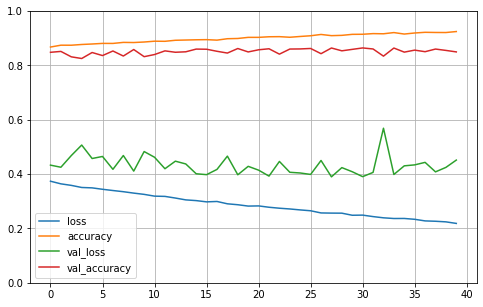

In [50]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [51]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 125us/sample - loss: 93.3452 - accuracy: 0.8260


[93.34522420043945, 0.826]

In [53]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [54]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)